<img src="copyright.jpg" width=15, height=15> These notes belong to Sridevi Pudipeddi. Apart from her students that have taken her courses, these notes should not be used for any reason. For education use, please get Sridevi Pudipeddi's permission before use. 

# Linear Regression

In this notebook, we will learn about one of the most popular ML techniques called Linear Regression. 

We will read a file. Understand the different features. 

Check if two features are correlated.

Then we choose a subset of features and build our model. 

After we build our model, we have to validate our model. For linear regression, we will use metrics such as mean squared error, mse and R-squared. 

In [3]:
# A library such as sklearn can be installed from within the notebook 
# by typing the following command. Remove the # and run the code and then after successful installation, comment the 
# code and then restart the kernel. 

#!pip install sklearn


In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [33]:
auto = pd.read_csv('Car_Purchasing_Data.csv')
print(auto.head())

     Customer Name                                    Customer e-mail Country  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu     USA   
1    Harlan Barnes                                eu.dolor@diam.co.uk     USA   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...     USA   
3  Jade Cunningham                            malesuada@dignissim.com     USA   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net     USA   

   Gender  Age  Annual Salary  Credit Card Debt    Net Worth  \
0       0   42    62812.09301      11609.380910  238961.2505   
1       0   41    66646.89292       9572.957136  530973.9078   
2       1   43    53798.55112      11160.355060  638467.1773   
3       1   58    79370.03798      14426.164850  548599.0524   
4       1   57    59729.15130       5358.712177  560304.0671   

   Car Purchase Amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4  

In [34]:
auto.head()

Customer Name                                    Customer e-mail Country  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu     USA   
1    Harlan Barnes                                eu.dolor@diam.co.uk     USA   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...     USA   
3  Jade Cunningham                            malesuada@dignissim.com     USA   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net     USA   

   Gender  Age  Annual Salary  Credit Card Debt    Net Worth  \
0       0   42    62812.09301      11609.380910  238961.2505   
1       0   41    66646.89292       9572.957136  530973.9078   
2       1   43    53798.55112      11160.355060  638467.1773   
3       1   58    79370.03798      14426.164850  548599.0524   
4       1   57    59729.15130       5358.712177  560304.0671   

   Car Purchase Amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4          55915.46248

In [35]:
print(auto.shape)

(500, 9)


In [36]:
print(auto["Country"].unique())

['USA']


In [37]:
print(auto.columns)
print(auto.dtypes)

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')
Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object


### What is our goal?

We have 9 columns. The dependent column is Car Purchase Amount. 

Since Customer Name, Customer e-mail and Country columns are catergorical variables and will not have any bearing on our prediction we will drop these columns now. 

Goal: We want to find a linear equation so that we can predict Car Purchase Amount. 

We will consider: Gender, Age, Annual Salary, Credit Card Debt and Net Worth as independent variables and Car Purchase Amount will be our dependent varaible also known as target variable. 



In [38]:
# dropping 

auto.drop(["Customer Name", "Customer e-mail", "Country"], \
          axis=1, inplace=True)

print(auto.shape)

print(auto.columns)

(500, 6)
Index(['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')


### Plotting pairplot and correlation coefficients using heatmap

As correlation is computed between two features, this is best expressed in terms of pairplot. Do plot this, we will use seaborn library which we will import as sns. 

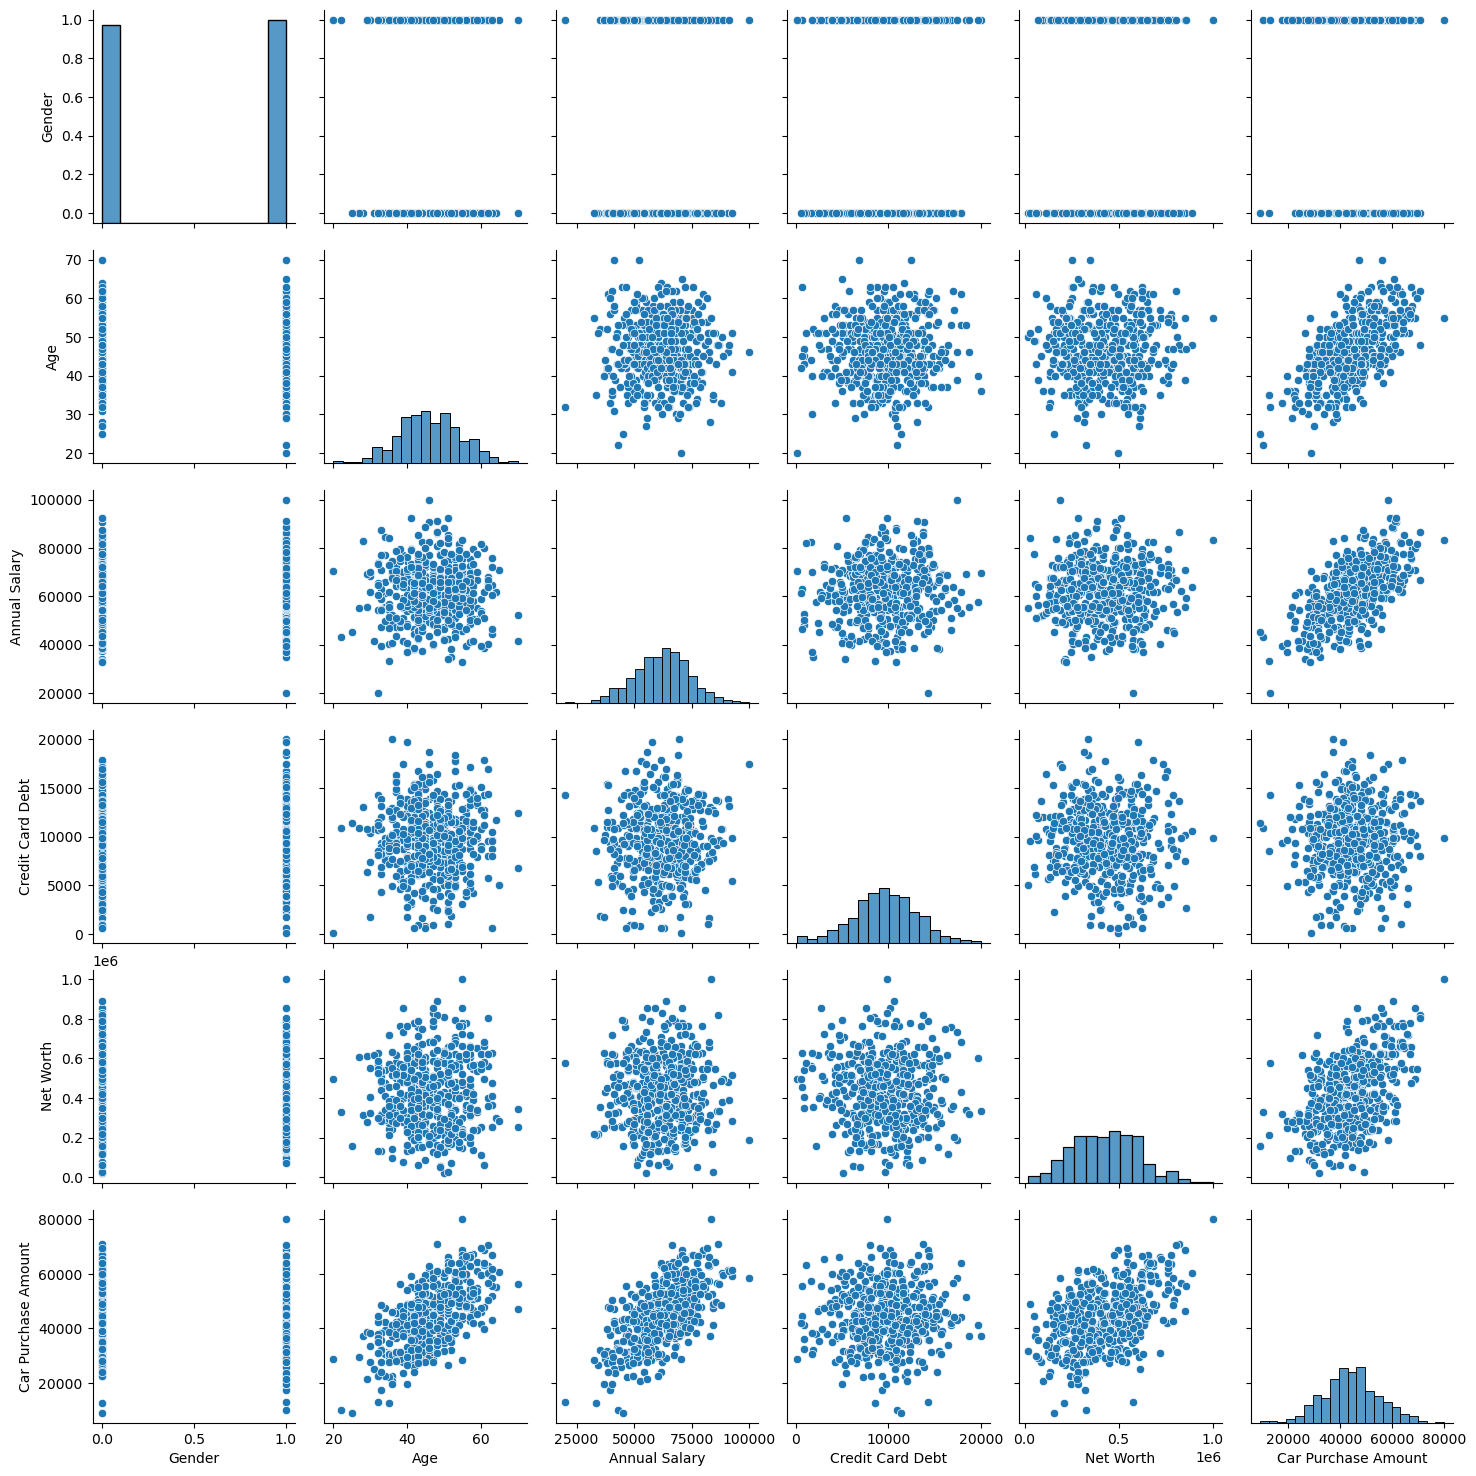

In [11]:
# library
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(auto)
plt.show()

##### Observations from the pairplot 

We have to fill this

1) Gender takes two values, male is represented by 0 and female by 1. 

2) We notice a positive correlation between Car Purchase Amount and Age

3) We notice a positive correlation between Car Purchase Amount and Annual Salary

4) We notice a positive correlation between Car Purchase Amount and Net Worth.

#### Displaying Correlation co-efficients using Heatmap

(6.5, -0.5)

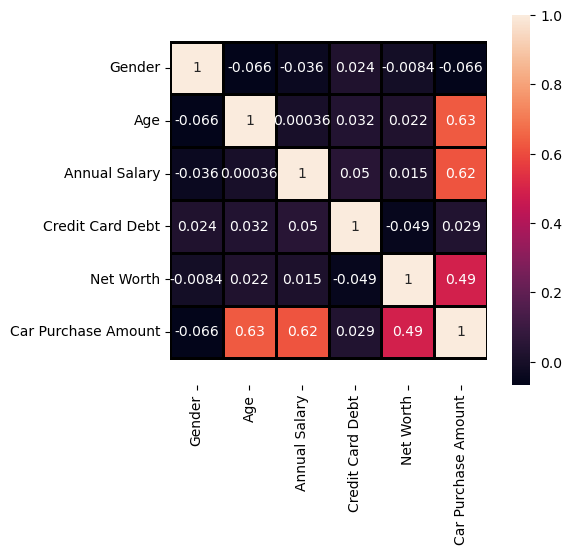

In [12]:
matrix = np.triu(auto.corr())

ax = sns.heatmap(auto.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black') #, mask=matrix)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

##### Note - 

Since the heatmap is symmetric about the diagonal, we can mask the upper traingle. This is shown in the code below. 

(6.5, -0.5)

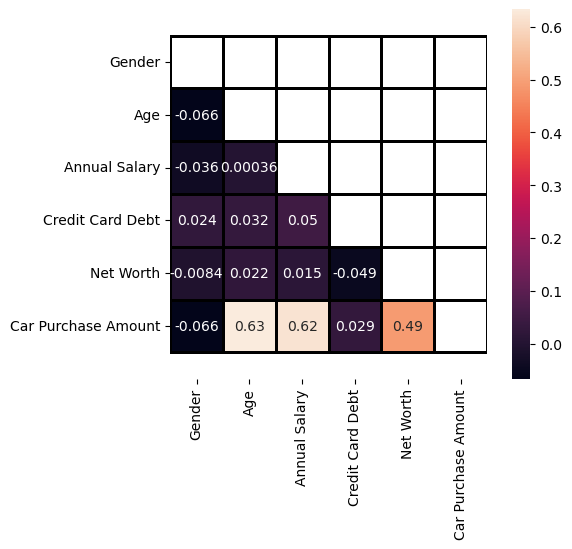

In [13]:
matrix = np.triu(auto.corr())

ax = sns.heatmap(auto.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black', mask=matrix)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Which features to select?

After computing the correlation coefficients. 

Choose features that are not correlated. 

#### Let's list which variables are correlated with which:

We have to fill this 

In this dataset no two input features are correlated. 
Hence, we have to consider the 5 input features to build our model. 

### Multilinear Regression

In a multilinear regression, instead of one independent variable, we will consider more than one independent variable to find a linear relationship between independent variables and dependent variable. We will consider 5 independent variables to find a linear relationship between them and our target variable, Car Purchase Amount. 

In [39]:
# creating an instance of LinearRegression class
reg = linear_model.LinearRegression()
print(reg)

LinearRegression()


#### Explanation

x = all independent variables that we are considering for our study.

y = car purchase amount.

Goal: get a linear (multi-linear) relationship between y and x.

How many rows are there? 

The data is split so that we can use majority for training the model. Once the model is trained, we use the remaining data that was not used to test the model. 

y = y_known

using the model we can y_predict.


train_test_split() will return 4 things: x_train, x_test, y_train, y_test


$x_1,  y_1$

$x_2, y_2 $

$x_3,  y_3$

$x_4,  y_4$

$x_5,  y_5$


x_train = $[x_1, x_2,x_3,x_4]$

y_train = $[y_1,y_2,y_3,y_4]$

x_test = $[x_5]$

y_test = $[y_5].$ 

In [40]:
auto.describe()

Gender         Age  Annual Salary  Credit Card Debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.224000   62127.239608       9607.645049   
std      0.500465    7.990339   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   41.000000   54391.977195       7397.515792   
50%      1.000000   46.000000   62915.497035       9655.035568   
75%      1.000000   52.000000   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            Net Worth  Car Purchase Amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000

##### Observations about the values that the features take. 

We have to fill this 

Age is a two digit value and its units are years

Annual Salary is 5 to 6 digits long and its units are dollars.  

To make the features unit-less, that means we would scale them. There are several scaling techniques. Two most commonly used ones are:

Standard Scaler - This is used when the feature is normally distributed. 

Min-Max scaler - This is used when the feature is not normally distributed. 

### Standard Scaler

We have to plot each feature and see if the distribution is normal. If yes, they we can perfrom standard scaler so that 
the mean will be zero and standard deviation will be 1. 

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
a_scaler = StandardScaler() # creating an instance of Standard Scaler

In [43]:
auto_independent = a_scaler.fit_transform(auto[['Age','Annual Salary', 'Credit Card Debt', 'Net Worth']])

In [44]:
print(type(auto_independent))

<class 'numpy.ndarray'>


In [20]:
auto[['Age','Annual Salary', 'Credit Card Debt', 'Net Worth']].head()

Age  Annual Salary  Credit Card Debt    Net Worth
0   42    62812.09301      11609.380910  238961.2505
1   41    66646.89292       9572.957136  530973.9078
2   43    53798.55112      11160.355060  638467.1773
3   58    79370.03798      14426.164850  548599.0524
4   57    59729.15130       5358.712177  560304.0671

In [45]:
# after scaling
auto_independent[0:5]

array([[-0.52916784,  0.05857619,  0.57427133, -1.11046945],
       [-0.65444432,  0.38657041, -0.0099515 ,  0.57392937],
       [-0.40389136, -0.71236095,  0.4454518 ,  1.19397625],
       [ 1.47525579,  1.47479358,  1.38236908,  0.67559542],
       [ 1.34997932, -0.20511086, -1.21896218,  0.74311275]])

In [46]:
# using train_test_split(), we are splitting the data into training and test 
# x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(auto_independent, auto["Car Purchase Amount"], test_size=0.2, random_state=4)

In [47]:
# we have to fit the data
reg.fit(x_train, y_train)

LinearRegression()

In [48]:
# y = mx + b here m is the coefficient (or slope) of x 
# and b is the intercept

print(reg.coef_) # 
print(reg.intercept_)

[6698.49987763 6568.62278558   20.6676723  5020.44202563]
44203.966801967785


#### The relationship between the independent and dependent variables is 

'Age','Annual Salary', 'Credit Card Debt', and 'Net Worth' are independent features 
and Car Purchase Amount is the target or dependent feature

car_purchase = age* 6698 + annual_salary* 6568 + credit_card_debt* 20 + net_worth* 5020 + 44203 

### Computing the predicted values

yhat stands for predicted values of y and for this we 
have to use the x_test values

In [49]:
yhat = reg.predict(x_test) 

### Is our Model Good? 

We will use Mean Squared Error, MSE to compute the loss. 

#### An example to compute MSE loss


| True | Predicted | True-Predicted | (True-Predicted)^2 |
| -------- | -------- | -------- | -------- |
| 3| 5| -2 | 4 |
| 5| 3 | 2 | 4 |

In [50]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, yhat)
print(mse_test)

60782.51670041259


#### MSE has no upperbound

Since MSE has no upper bound, we compute the ratio between 
mse_test and mse_train or relative difference to see if 
ratio is close to one and difference is less than 5%.

#### Predicting target values for train set

y_t_predict stands for predicted values of y for training set

In [51]:
# y_t_predict is the predicted y values for the x_train data
y_t_predict = reg.predict(x_train)

# note that y_train is the true y value
mse_train = mean_squared_error(y_train, y_t_predict)
print(mse_train)

57257.25220095114


#### Ratio and Relative Difference

In [52]:
r1 = mse_test/mse_train

diff1 = np.abs((mse_train - mse_test)/mse_train)

print(r1)

print(diff1)

1.0615688731811495
0.06156887318114949


#### R-Squared for Goodness of Fit

In [53]:
from sklearn.metrics import r2_score

print("r-squared for the test data: ", r2_score(y_test, yhat))
    
print("r-squared for the train data: ", r2_score(y_train, y_t_predict))

r-squared for the test data:  0.9994342211483591
r-squared for the train data:  0.999507487102516


#### Conclusion:

r-squared for test is 0.9994  and for train is 0.9995

Our multi-linear model seems like a good fit.

#### New Point

Let's consider age 41, annual_salary = 66646.89292 credit_Card_debt=9572.957136, net_worth=530973.9078. The true value for this is car_purchase_amount=45115.52566. 

Let's use our model and predict the car_purchase_amount for this particular input.

Since we scaled the train data before we build the model, we have to scale this new input as well. So we apply Standard Scaler to the x_new and then use the model to predict.

In [30]:
x_new = pd.DataFrame([[41, 66646.89292,9572.957136,530973.9078]])
print(x_new)


# apply a_scaler to the x_new
x_new_scaled = a_scaler.transform(x_new)
print(x_new_scaled)

print(reg.predict(x_new_scaled))

    0            1            2            3
0  41  66646.89292  9572.957136  530973.9078
[[-0.65444432  0.38657041 -0.0099515   0.57392937]]
[45240.58032629]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
"""
In-class activity: In the auto example, find the multi-linear relationship 
between 'Age','Annual Salary', 'Credit Card Debt' with 'Car Purchase Amount'. 
Find the mean squared error  and R-squared for test set 
and train set and make a conclusion. 

# Since MSE has no upper bound, we compute the ratio between 
# mse_test and mse_train or relative difference to see if 
# ratio is close to one and relative difference is less than 5%
"""

"\nIn-class activity: In the auto example, find the multi-linear relationship \nbetween 'Age','Annual Salary', 'Credit Card Debt' with 'Car Purchase Amount'. \nFind the mean squared error  and R-squared for test set \nand train set and make a conclusion. \n\n# Since MSE has no upper bound, we compute the ratio between \n# mse_test and mse_train or relative difference to see if \n# ratio is close to one and difference is less than 5%\n"

Resources -
https://towardsdatascience.com/differential-equations-basics-c72db0a8c42a

Understandable Statistics: Concepts and Methods, Enhanced 11th Edition
by Charles Henry Brase (Author), Corrinne Pellillo Brase (Author)


Linear regression calculator

https://www.socscistatistics.com/tests/regression/default.aspx